In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
       		 print(os.path.join(dirname, filename))


In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)


2.17.0


In [3]:
!pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/385.0 MB 12.2 MB/s eta 0:00:32
   ---------------------------------------- 0.8/385.0 MB 8.8 MB/s eta 0:00:44
   ---------------------------------------- 1.2/385.0 MB 8.3 MB/s eta 0:00:47
   ---------------------------------------- 1.4/385.0 MB 9.8 MB/s eta 0:00:40
   ---------------------------------------- 1.5/385.0 MB 6.3 MB/s eta 0:01:01
   ---------------------------------------- 1.9/385.0 MB 6.9 MB/s eta 0:00:56
   ---------------------------------------- 2.4/385.0 MB 7.6 MB/s eta 0:00:51
   ---------------------------------------- 3.0/385.0 MB 7.9 MB/s eta 0:00:49
   ---------------------------------------- 3.3/385.0 MB 8.1 MB/s eta 0:00:47
   ---------------------------------------- 3.7/385.0 MB 8.1 MB/s eta 0:00

In [10]:
from pathlib import Path

# Define directories using raw strings to avoid escape character issues
train_dir = Path(r'C:\Users\mas_r\OneDrive\Desktop\Major project\Dataset\train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path(r'C:\Users\mas_r\OneDrive\Desktop\Major project\Dataset\test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path(r'C:\Users\mas_r\OneDrive\Desktop\Major project\Dataset\validation')
val_filepaths = list(val_dir.glob(r'**/*.jpg'))  # Corrected from test_dir to val_dir


In [12]:
import pandas as pd
from pathlib import Path

def image_processing(filepath):
    """Create a DataFrame with the filepath and the labels of the pictures."""
    
    # Extract labels using Path to handle file paths correctly
    labels = [Path(fp).parts[-2] for fp in filepath]
    
    # Create DataFrame from filepaths and labels
    filepath_series = pd.Series(filepath, name='Filepath').astype(str)
    labels_series = pd.Series(labels, name='Label')
    
    # Combine into a DataFrame
    df = pd.concat([filepath_series, labels_series], axis=1)
    
    # Shuffle the DataFrame
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df

# Process the filepaths for train, test, and validation sets
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

# Print some details about the training set
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')


-- Training set --

Number of pictures: 2855

Number of different labels: 36

Labels: ['pomegranate' 'pear' 'kiwi' 'ginger' 'soy beans' 'cauliflower'
 'watermelon' 'cucumber' 'cabbage' 'beetroot' 'peas' 'lemon' 'lettuce'
 'corn' 'raddish' 'turnip' 'banana' 'paprika' 'onion' 'orange' 'tomato'
 'jalepeno' 'pineapple' 'potato' 'carrot' 'garlic' 'sweetcorn'
 'sweetpotato' 'eggplant' 'chilli pepper' 'bell pepper' 'apple' 'spinach'
 'mango' 'grapes' 'capsicum']


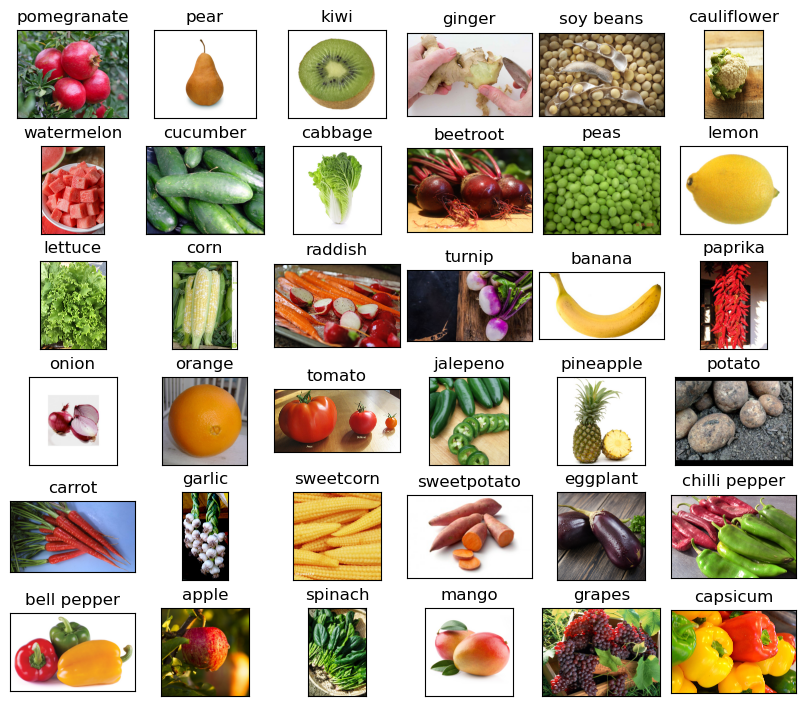

Found 2855 validated image filenames belonging to 36 classes.


In [13]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


In [14]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


Found 340 validated image filenames belonging to 36 classes.


In [15]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


Found 340 validated image filenames belonging to 36 classes.


In [16]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5


C:\Users\mas_r\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step - accuracy: 0.3333 - loss: 2.5964 - val_accuracy: 0.8294 - val_loss: 0.5558
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.8111 - loss: 0.6055 - val_accuracy: 0.8971 - val_loss: 0.3612
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.8617 - loss: 0.3866 - val_accuracy: 0.9176 - val_loss: 0.2520
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.9344 - loss: 0.2191 - val_accuracy: 0.9441 - val_loss: 0.1926
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9594 - loss: 0.1377 - val_accuracy: 0.9471 - val_loss: 0.1819


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load test images
test_datagen = ImageDataGenerator(rescale=1./255)

test_dir = r"C:\Users\mas_r\OneDrive\Desktop\Major project\Dataset\test"
test_images = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict the labels of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred, axis=1)

# Map the labels
labels = (train_images.class_indices)
labels = dict((v, k) for k, v in labels.items())
pred1 = [labels[k] for k in pred]

def output(location):
    img = load_img(location, target_size=(224, 224))
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    answer = model.predict(img)
    y_class = answer.argmax(axis=-1)
    res = labels[y_class[0]]  # Get the label
    return res

# Test the output function
img_result = output(r"C:\Users\mas_r\OneDrive\Desktop\Major project\Dataset\test\cabbage\Image_1.jpg")
print(img_result)

# Save the model
model.save('FV.h5')


Found 359 images belonging to 36 classes.
12/12 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


cabbage
